<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Проверка-целевых-признаков" data-toc-modified-id="Проверка-целевых-признаков-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Проверка целевых признаков</a></span></li><li><span><a href="#Заполнение-пропусков" data-toc-modified-id="Заполнение-пропусков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Заполнение пропусков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Концентрация-металлов" data-toc-modified-id="Концентрация-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Концентрация металлов</a></span></li><li><span><a href="#Распределение-размера-гранул-в-выборках" data-toc-modified-id="Распределение-размера-гранул-в-выборках-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Распределение размера гранул в выборках</a></span></li><li><span><a href="#Суммарная-концентрация-веществ" data-toc-modified-id="Суммарная-концентрация-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Суммарная концентрация веществ</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Подготовка" data-toc-modified-id="Подготовка-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Подготовка</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></div>

# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.dummy import DummyRegressor

pd.set_option('display.max_columns', None)
# 'display.max_rows', None)

RND_SEED = 12345


In [2]:
try:
    data_full = pd.read_csv('/Users/evgeniu/Desktop/Education/Practicum /Gold_industry/gold_industry_full.csv')
    data_test = pd.read_csv('/Users/evgeniu/Desktop/Education/Practicum /Gold_industry/gold_industry_test.csv')
    data_train = pd.read_csv('/Users/evgeniu/Desktop/Education/Practicum /Gold_industry/gold_industry_train.csv')
except:
    data_full = pd.read_csv('/datasets/gold_industry_full.csv')
    data_test = pd.read_csv('/datasets/gold_industry_test.csv')
    data_train = pd.read_csv('/datasets/gold_industry_train.csv')

In [3]:
data_full.info(False)
data_full.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Columns: 87 entries, date to final.output.tail_sol
dtypes: float64(86), object(1)
memory usage: 12.9+ MB


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [4]:
data_test.info(False)
data_test.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Columns: 53 entries, date to secondary_cleaner.state.floatbank6_a_level
dtypes: float64(52), object(1)
memory usage: 2.0+ MB


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2017-12-09 14:59:59,4.365491,6.158718,3.875727,39.135119,555.820208,94.544358,6.146982,9.308612,1196.238112,-299.862743,1147.248241,-500.363165,1047.279065,-500.354091,948.756608,-498.439416,849.441918,-499.255503,850.112246,-499.407112,6.168939,9.309852,95.248427,8.078957,6.500000,1.283045,1648.759906,-399.862053,1650.135395,-399.957321,1648.831890,-400.586116,1649.464582,-400.673303,34.940919,-500.150510,30.031867,-500.328335,26.033990,-500.147792,22.952306,-500.037678,23.018622,-500.492702,20.020205,-500.220296,17.963512,-499.939490,12.990306,-500.080993,19.990336,-499.191575
1,2017-12-09 15:59:59,4.362781,6.048130,3.902537,39.713906,544.731687,123.742430,6.210119,9.297709,1201.904177,-299.907308,1154.087804,-500.036580,1054.009756,-500.237335,944.138793,-496.866953,851.589767,-499.040466,851.345606,-499.122561,6.209517,9.297194,98.880538,7.984164,6.500000,1.241969,1646.547763,-398.977083,1648.212240,-400.383265,1648.917387,-399.521344,1651.498591,-399.745329,34.980742,-498.131002,29.968453,-586.013330,25.971737,-499.608392,22.958448,-499.821308,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471
2,2017-12-09 16:59:59,5.081681,6.082745,4.564078,37.208683,558.155110,82.610855,7.363824,9.003562,1200.826926,-300.124116,1150.754676,-499.986009,1049.182824,-500.014696,948.085464,-499.997003,850.170086,-500.270334,849.557905,-500.198702,7.358308,9.000624,119.497545,8.003752,6.500000,1.259741,1647.368779,-399.788506,1648.395206,-400.166490,1648.953828,-400.468641,1649.821569,-400.071884,34.952967,-501.204647,29.927025,-500.106628,25.978253,-499.890060,23.004376,-500.014529,22.993827,-501.559663,20.029144,-500.000662,18.012723,-500.024764,13.016445,-500.058432,19.973767,-501.394155
3,2017-12-09 17:59:59,5.145949,6.084374,4.768124,36.808874,539.713765,77.984784,6.927072,8.955597,1199.292489,-299.778385,1152.512559,-500.338106,1052.601592,-499.695075,955.171539,-500.294989,851.957342,-499.779541,850.765662,-501.030559,6.929364,8.920717,108.080163,7.970121,6.660000,0.774909,1652.660845,-399.702218,1651.203128,-400.291472,1651.924848,

In [5]:
data_train.info(False)
data_train.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Columns: 87 entries, date to final.output.tail_sol
dtypes: float64(86), object(1)
memory usage: 9.7+ MB


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
0,2016-01-15 00:00:00,6.486150,6.100378,2.284912,36.808594,523.546326,55.486599,11.986616,6.007990,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,11.836743,6.005818,41885.707031,3481.779053,3520.337158,2.838687,19.793808,11.500771,7.101074,28.029297,87.107763,1.170244,5.008018,0.508728,19.154297,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,34.174427,8.547551,10.389648,19.529297,2.106679,14.936526,2.534912,7.476074,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,2.606185,14.500184,4.694824,8.764648,42.192020,6.055403,9.889648,5.507324,70.541216,2.143149,10.411962,0.895447,16.904297
1,2016-01-15 01:00:00,6.478583,6.161113,2.266033,35.753385,525.290581,57.278666,11.971193,6.005766,1000.286398,-400.065196,1600.754587,-449.953435,1600.47

In [6]:
data = {'train' : data_train, 'test': data_test, 'full': data_full}

In [7]:
def set_date_as_index(data):
    if (data.duplicated().sum() == 0):
        data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d %H:%M:%S')
        return data.set_index(['date'])
    else: print('Error')

In [8]:
def transform_to_multiindex(columns):
    col = str(list(columns)).strip('[\']').split('\', \'')
    sep_col = []
    for line in col:
        sep_col.append(line.split('.')) 
    return pd.MultiIndex.from_tuples(sep_col)

In [9]:
def recovery_calculate(concentrate, feed, tail):
    return (concentrate * (feed-tail) / (feed * (concentrate - tail))) * 100

In [10]:
for k in data.keys():
    data[k] = set_date_as_index(data[k])
    data[k].columns = transform_to_multiindex(data[k])

Подсчет 

In [11]:
mean_absolute_error(data['train']['rougher', 'output', 'recovery'], 
                    recovery_calculate(data['train']['rougher', 'output', 'concentrate_au'],
                                       data['train']['rougher', 'input', 'feed_au'],
                                       data['train']['rougher', 'output', 'tail_au']))

9.83758577644259e-15

 MAE Для 'rougher.output.recovery' признака совпадает с рассчитанным по формуле

In [12]:
col_full = data['full'].columns.to_list()
col_test = data['test'].columns.to_list()
not_in_test = []
for col in col_full:
    if col not in col_test: not_in_test.append(col)
not_in_test

[('rougher', 'calculation', 'sulfate_to_au_concentrate'),
 ('rougher', 'calculation', 'floatbank10_sulfate_to_au_feed'),
 ('rougher', 'calculation', 'floatbank11_sulfate_to_au_feed'),
 ('rougher', 'calculation', 'au_pb_ratio'),
 ('rougher', 'output', 'concentrate_au'),
 ('rougher', 'output', 'concentrate_ag'),
 ('rougher', 'output', 'concentrate_pb'),
 ('rougher', 'output', 'concentrate_sol'),
 ('rougher', 'output', 'recovery'),
 ('rougher', 'output', 'tail_au'),
 ('rougher', 'output', 'tail_ag'),
 ('rougher', 'output', 'tail_pb'),
 ('rougher', 'output', 'tail_sol'),
 ('primary_cleaner', 'output', 'concentrate_au'),
 ('primary_cleaner', 'output', 'concentrate_ag'),
 ('primary_cleaner', 'output', 'concentrate_pb'),
 ('primary_cleaner', 'output', 'concentrate_sol'),
 ('primary_cleaner', 'output', 'tail_au'),
 ('primary_cleaner', 'output', 'tail_ag'),
 ('primary_cleaner', 'output', 'tail_pb'),
 ('primary_cleaner', 'output', 'tail_sol'),
 ('secondary_cleaner', 'output', 'tail_au'),
 ('seco

В тестовом сете отсутстуют признаки связанные с количеством продукта на выходе, и расчетные характеристики. Эти метрики расчитываются вне технологического процесса и считаются "оффлайн" метриками. Для предсказания целевых показателей модель будет использоваться в реальном времени, когда эти метрики будут еще недоступны.

### Проверка целевых признаков

In [13]:
def get_kde(column, x_label = None, y_label = None, legend = None, title = None, x_lim = None):
    plt.figure(figsize=(8,5))
    for item in column:
        sns.kdeplot(item, fill=True, alpha=0.35)
    if legend: plt.legend(legend)
    if x_label: plt.xlabel(x_label)
    if title: plt.title(title)
    if y_label: plt.ylabel(y_label)
    if x_lim: plt.xlim(x_lim)
    plt.show()
    

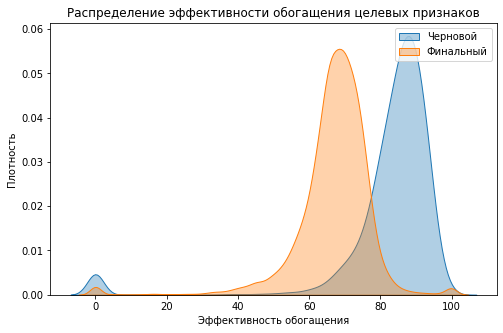

In [14]:
get_kde([data['train']['rougher', 'output', 'recovery'], 
         data['train']['final', 'output', 'recovery']], 'Эффективность обогащения', 
        legend=['Черновой','Финальный'], y_label = 'Плотность', 
        title = 'Распределение эффективности обогащения целевых признаков')

В распределении имеются крайние значения для эффективности обогащения в области 0 и 100

In [15]:
display(data['train']['rougher', 'output', 'recovery'].value_counts().sort_values(ascending=False).head(5),
        data['train']['final', 'output', 'recovery'].value_counts().sort_values(ascending=False).head(5))

0.000000     394
83.406924     10
89.512544      5
91.792293      5
91.636690      4
Name: (rougher, output, recovery), dtype: int64

0.000000      98
100.000000    72
71.668249      5
67.275195      5
75.962757      4
Name: (final, output, recovery), dtype: int64

In [16]:
data['train'] = data['train'].drop(data['train'][(data['train']['rougher', 'output', 'recovery']==0) | 
                                                 (data['train']['final', 'output', 'recovery']==0) |
                                                 (data['train']['final', 'output', 'recovery']==100)].index ,axis=0)

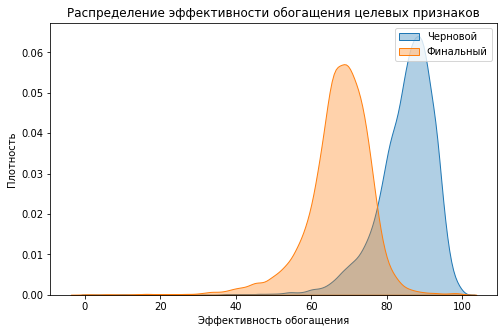

In [17]:
get_kde([data['train']['rougher', 'output', 'recovery'], 
         data['train']['final', 'output', 'recovery']], 'Эффективность обогащения', 
        legend=['Черновой','Финальный'], y_label = 'Плотность', 
        title = 'Распределение эффективности обогащения целевых признаков')

### Заполнение пропусков

In [18]:
data['full'].isna().sum().sum()

4481

В данных имеются пропуски, для их заполнения применен метод ближайших соседей, так как значения рядом имеют близкие значения.

In [19]:
imputer = KNNImputer(n_neighbors=2)
data['train_filled'] = pd.DataFrame(imputer.fit_transform(data['train']),
                                                        index=data['train'].index, 
                                                        columns=data['train'].columns)
data['train_filled']

rougher                                             \
                        input                                              
                      feed_au   feed_ag   feed_pb   feed_sol   feed_rate   
date                                                                       
2016-01-15 00:00:00  6.486150  6.100378  2.284912  36.808594  523.546326   
2016-01-15 01:00:00  6.478583  6.161113  2.266033  35.753385  525.290581   
2016-01-15 02:00:00  6.362222  6.116455  2.159622  35.971630  530.026610   
2016-01-15 03:00:00  6.118189  6.043309  2.037807  36.862241  542.590390   
2016-01-15 04:00:00  5.663707  6.060915  1.786875  34.347666  540.531893   
...                       ...       ...       ...        ...         ...   
2017-12-09 09:59:59  4.599524  5.822083  4.255546  37.480479  559.895089   
2017-12-09 10:59:59  4.658125  5.844800  4.241564  37.395565  561.464855   
2017-12-09 11:59:59  5.335862  6.091855  4.617558  37.369774  560.889077   
2017-12-09 12:59:59  4.838619  6.121323  4.144989  38.591551  559.031805   
2017-12-09 13:59:59  4.525061  5.970515  4.020002  40.074026  555.682872   

                                                                          \
                                                                           
                      feed_size floatbank10_sulfate floatbank10_xanthate   
date                                                                       
2016-01-15 00:00:00   55.486599           11.986616             6.007990   
2016-01-15 01:00:00   57.278666           11.971193             6.005766   
2016-01-15 02:00:00   57.510649           11.920603             6.197377   
2016-01-15 03:00:00   57.792734           11.630094             6.203177   
2016-01-15 04:00:00   56.047189           10.957755             6.198826   
...                         ...                 ...                  ...   
2017-12-09 09:59:59   85.247019            6.775864             9.005425   
2017-12-09 10:59:59   83.860651            6.770561             9.000889   
2017-12-09 11:59:59   85.718304            7.762770             9.158609   
2017-12-09 12:59:59  119.499241            7.356687             9.304952   
2017-12-09 13:59:59  122.262690            6.586020             9.299606   

                                                                             \
                                state                                         
                    floatbank10_a_air floatbank10_a_level floatbank10_b_air   
date                                                                          
2016-01-15 00:00:00        999.706909         -404.066986       1603.011353   
2016-01-15 01:00:00       1000.286398         -400.065196       1600.754587   
2016-01-15 02:00:00        999.719565         -400.074028       1599.337330   
2016-01-15 03:00:00        999.814770         -400.200179       1600.059442   
2016-01-15 04:00:00        999.678690         -399.752729       1600.208824   
...                               ...                 ...               ...   
2017-12-09 09:59:59       1200.454685         -300.012582       1150.627632   
2017-12-09 10:59:59       1200.958146         -300.013649       1149.862859   
2017-12-09 11:59:59       1199.245914         -300.845518       1149.807890   
2017-12-09 12:59:59       1196.569267         -299.512227       1147.675196   
2017-12-09 13:59:59       1204.866639         -299.235675       1149.942902   

                                                                               \
                                                                                
                    floatbank10_b_level floatbank10_c_air floatbank10_c_level   
date                                                                            
2016-01-15 00:00:00         -434.715027       1602.375000         -442.204468   
2016-01-15 01:00:00         -449.953435       1600.479580         -449.830646   
2016-01-15 02:00:00         -450.008530       1599.672797         -4

In [20]:
data['half_filled'] = data['full']

In [21]:
data['half_filled'].update(data['train_filled'])

In [22]:
data['full_filled'] = pd.DataFrame(imputer.transform(data['half_filled']),
                                        index=data['half_filled'].index,
                                        columns=data['half_filled'].columns)

In [23]:
data['test_filled'] = data['full_filled'].loc[data['test'].index, data['test'].columns]

В ходе подготовки данных выявлены и устранены аномалии в целевых признаках, заполнены пропуски в данных методом ближайших соседей

## Анализ данных

### Концентрация металлов

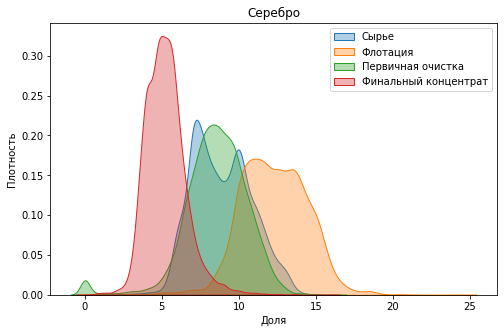

In [24]:
get_kde([data['train_filled']['rougher', 'input', 'feed_ag'],
        data['train_filled']['rougher', 'output', 'concentrate_ag'],
        data['train_filled']['primary_cleaner', 'output', 'concentrate_ag'],
        data['train_filled']['final', 'output', 'concentrate_ag']], 
                legend=['Сырье','Флотация', 'Первичная очистка', 'Финальный концентрат'], title='Серебро', 
                x_label='Доля', y_label ='Плотность')

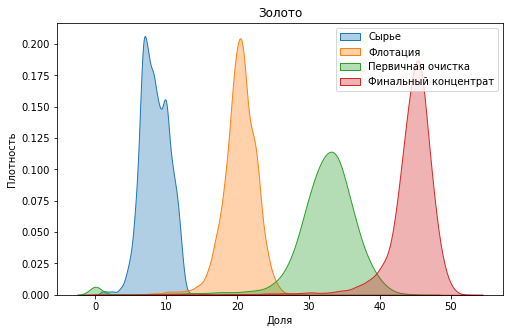

In [25]:
get_kde([data['train_filled']['rougher', 'input', 'feed_au'],
        data['train_filled']['rougher', 'output', 'concentrate_au'],
        data['train_filled']['primary_cleaner', 'output', 'concentrate_au'],
        data['train_filled']['final', 'output', 'concentrate_au']], 
                legend=['Сырье','Флотация', 'Первичная очистка', 'Финальный концентрат'], title='Золото', 
                x_label='Доля', y_label ='Плотность')

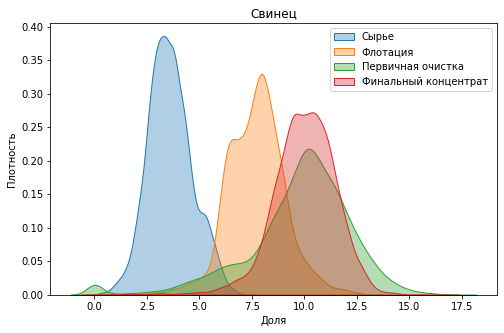

In [26]:
get_kde([data['train_filled']['rougher', 'input', 'feed_pb'],
        data['train_filled']['rougher', 'output', 'concentrate_pb'],
        data['train_filled']['primary_cleaner', 'output', 'concentrate_pb'],
        data['train_filled']['final', 'output', 'concentrate_pb']], 
                legend=['Сырье','Флотация', 'Первичная очистка', 'Финальный концентрат'], title='Свинец', 
                x_label='Доля', y_label ='Плотность')

На распределениях видно, как процесс очистки повышает концентрацию золота обычно с 20 до 45%, доля свинца уменьшается после флотации, после сохраняется, доля серебра уменьшается после каждого процесса.

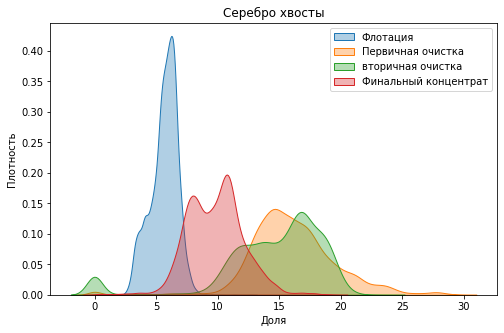

In [27]:
get_kde([data['train_filled']['rougher', 'output', 'tail_ag'],
        data['train_filled']['primary_cleaner', 'output', 'tail_ag'],
        data['train_filled']['secondary_cleaner', 'output', 'tail_ag'],
        data['train_filled']['final', 'output', 'tail_ag']], 
                legend=['Флотация','Первичная очистка', 'вторичная очистка', 'Финальный концентрат'], title='Серебро хвосты',
                x_label='Доля', y_label ='Плотность')

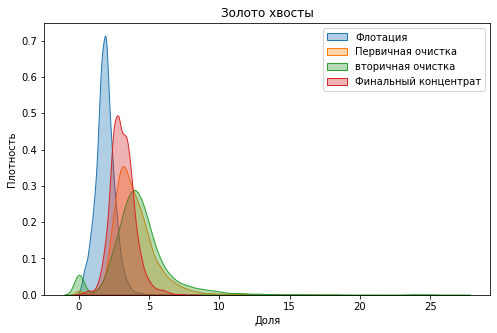

In [28]:
get_kde([data['train_filled']['rougher', 'output', 'tail_au'],
        data['train_filled']['primary_cleaner', 'output', 'tail_au'],
        data['train_filled']['secondary_cleaner', 'output', 'tail_au'],
        data['train_filled']['final', 'output', 'tail_au']], 
                legend=['Флотация','Первичная очистка', 'вторичная очистка', 'Финальный концентрат'], title='Золото хвосты',
                x_label='Доля', y_label ='Плотность')

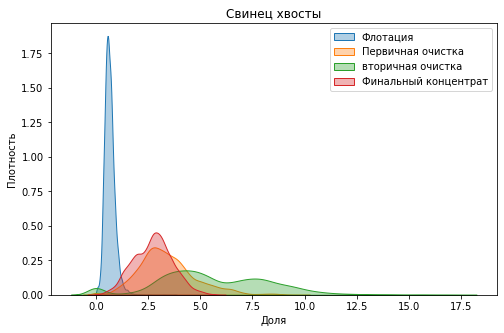

In [29]:
get_kde([data['train_filled']['rougher', 'output', 'tail_pb'],
        data['train_filled']['primary_cleaner', 'output', 'tail_pb'],
        data['train_filled']['secondary_cleaner', 'output', 'tail_pb'],
        data['train_filled']['final', 'output', 'tail_pb']], 
                legend=['Флотация','Первичная очистка', 'вторичная очистка', 'Финальный концентрат'], title='Свинец хвосты',
                x_label='Доля', y_label ='Плотность')

В хвосты попадает небольшое количество золота. Флотация является наиболее стабильным процессом.
Плотность хостов свинца после флотации аномально высокая. Надо взглянуть на показания.

In [30]:
data['full_filled'].loc[:, (['rougher', 'primary_cleaner', 'secondary_cleaner', 'final'], 'output', 'tail_pb')]

,rougher,primary_cleaner,secondary_cleaner,final
,output,output,output,output
,tail_pb,tail_pb,tail_pb,tail_pb
date,,,,
2016-01-15 00:00:00,0.508728,2.534912,4.694824,0.895447
2016-01-15 01:00:00,0.536689,3.049646,4.592547,0.927452
2016-01-15 02:00:00,0.546416,3.124664,4.624775,0.953716
2016-01-15 03:00:00,0.542525,2.960362,4.482453,0.883763
2016-01-15 04:00:00,0.515438,3.112100,4.470737,0.792826
...,...,...,...,...
2018-08-18 06:59:59,0.754358,2.843019,4.460185,1.171459


In [31]:
data['full_filled'].loc[:, ('rougher', 'output', ['tail_pb', 'tail_ag'])]

rougher          
                       output          
                      tail_pb   tail_ag
date                                   
2016-01-15 00:00:00  0.508728  5.008018
2016-01-15 01:00:00  0.536689  4.955378
2016-01-15 02:00:00  0.546416  4.843460
2016-01-15 03:00:00  0.542525  4.655288
2016-01-15 04:00:00  0.515438  4.552800
...                       ...       ...
2018-08-18 06:59:59  0.754358  4.949871
2018-08-18 07:59:59  0.749174  4.930477
2018-08-18 08:59:59  0.630120  4.785475
2018-08-18 09:59:59  0.557099  4.559246
2018-08-18 10:59:59  0.615418  4.667157

[19439 rows x 2 columns]

Похоже в данные по свинцу вносили некорректные данные по объему. Похоже на ошибку в десяток. Домножим столбец:

In [32]:
anomaly_pb = False

In [33]:
if anomaly_pb:
    for k in ('train_filled', 'full_filled'):
        data[k]['rougher', 'output', 'tail_pb'] = data[k]['rougher', 'output', 'tail_pb'] * 10

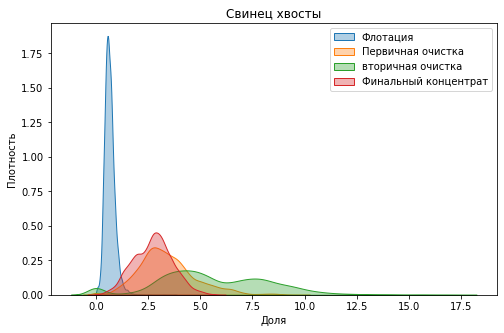

In [34]:
get_kde([data['train_filled']['rougher', 'output', 'tail_pb'],
        data['train_filled']['primary_cleaner', 'output', 'tail_pb'],
        data['train_filled']['secondary_cleaner', 'output', 'tail_pb'],
        data['train_filled']['final', 'output', 'tail_pb']], 
                legend=['Флотация','Первичная очистка', 'вторичная очистка', 'Финальный концентрат'], title='Свинец хвосты',
                x_label='Доля', y_label ='Плотность')

Уточнено: Доля свинца до 2% в отвальных хвостах флотации считается нормой. Крректировка не требуется.

Так-же на всех графиках присутствуют всплески около "0" значений на хвостах и основном сырье в первичной и вторичных очистках удалим их:

In [35]:
data['train_filled'].loc[:,(['primary_cleaner', 'secondary_cleaner'], 'output')].apply(lambda x: x==0).sum()

primary_cleaner    output  concentrate_au      88
                           concentrate_ag      88
                           concentrate_pb      88
                           concentrate_sol     88
                           tail_au             86
                           tail_ag             86
                           tail_pb             86
                           tail_sol            86
secondary_cleaner  output  tail_au            661
                           tail_ag            661
                           tail_pb            661
                           tail_sol           691
dtype: int64

In [36]:
data['train_filled'].shape

(14018, 86)

много значений имеют состояние 0, 0.01

In [37]:
data['train_filled'] = \
data['train_filled'][~data['train_filled']\
    .loc[:,(['primary_cleaner', 'secondary_cleaner'], 'output')]\
    .apply(lambda val: (val==0).any(), axis=1)]

In [38]:
data['train_filled'].shape

(13173, 86)

### Распределение размера гранул в выборках

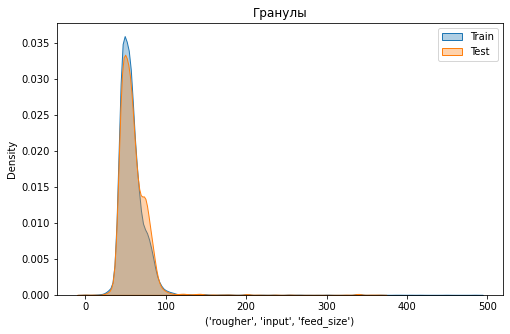

In [39]:
get_kde([data['train_filled']['rougher', 'input', 'feed_size'],
        data['test_filled']['rougher', 'input', 'feed_size']],
                legend=['Train', 'Test'], title='Гранулы')

С размером гранул все в порядке. Они совпадают, но в данных есть выбросы.

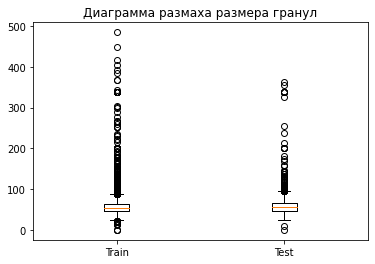

In [40]:
plt.boxplot([data['train_filled']['rougher', 'input', 'feed_size'].dropna(), 
             data['test_filled']['rougher', 'input', 'feed_size'].dropna()]);
plt.xticks([1,2], ['Train', 'Test'])
plt.title('Диаграмма размаха размера гранул')
plt.show()

Гранулы на все 500 ед. Возможно стоит проверять показания. Выбросы есть и в тесте и в трейне.

### Суммарная концентрация веществ

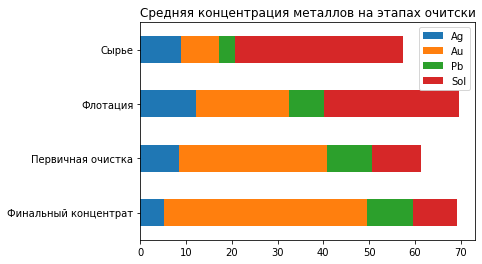

In [41]:
data_plot = data['train_filled'].loc[:, (['rougher', 'primary_cleaner', 'final'], ['output'], ['concentrate_au', 'concentrate_ag','concentrate_pb','concentrate_sol'])]
data_i_plot = data['train_filled'].loc[:, ('rougher', 'input', ['feed_au', 'feed_ag', 'feed_pb', 'feed_sol',])]
data_i_plot.columns = data_i_plot.columns.droplevel(1)
data_i_plot = data_i_plot.stack(1)
data_plot.columns = data_plot.columns.droplevel(1)
data_plot = data_plot.stack(1)
data_plot['input'] = data_i_plot['rougher'].to_list()
data_plot.reset_index(inplace=True)
data_plot.pivot_table(index='level_1', values=('rougher', 'input', 'primary_cleaner', 'final'), 
                      aggfunc='mean')\
         .transpose()\
         .loc[['final', 'primary_cleaner', 'rougher', 'input'],:]\
         .plot(kind='barh', stacked=True);
plt.yticks([3,2,1,0], ['Сырье','Флотация','Первичная очистка','Финальный концентрат']);
plt.legend(('Ag', 'Au', 'Pb', 'Sol'));
plt.title('Средняя концентрация металлов на этапах очитски');

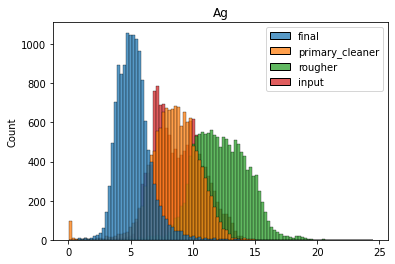

In [42]:
sns.histplot(data_plot[data_plot['level_1'] == 'concentrate_ag']);
plt.title('Ag');

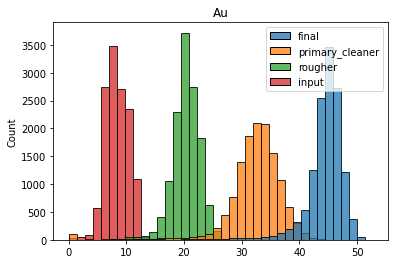

In [43]:
sns.histplot(data_plot[data_plot['level_1'] == 'concentrate_au']);
plt.title('Au');

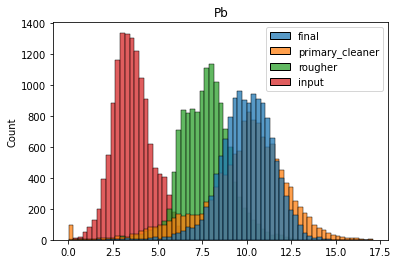

In [44]:
sns.histplot(data_plot[data_plot['level_1'] == 'concentrate_pb']);
plt.title('Pb');

Через каждый этап концентрация золота все больше и больше.

* В ходе анализа данных изучена концентрация металлов (Au, Ag, Pb) в сырье, в черновом концентрате, в концентрате после первой очистки и в финальном концентрате. По распределениям наблюдается увеличесние концентрации золота и уменьшения примесей. Выявлены аномальные показания в вторичной и перичной очистке чистового материала и хвостов.
* Распределения размеров гранул исходного сырья на обучающей и тестовой выборках совпадают, что позволяет использовать данные для обучения модели
* На суммарной концентрации веществ видно как каждый этам очистки равномерно увеличивает концентрацию золота. Свинец слабо выводится только после вторичной очистки. Серебро выводится только на вервичной и вторичной очистке

## Модель

### Подготовка

In [45]:
#Делимся на тренировочные Ху для червноовго и финального концентрата
X_train_rougher = data['train_filled'].loc[:,data['test_filled'].columns]
Y_train_rougher = data['train_filled']['rougher', 'output', 'recovery']

X_train_final = data['train_filled'].loc[:,data['test_filled'].columns]
Y_train_final = data['train_filled']['final', 'output', 'recovery']

In [46]:
#Масштабирование признаков
scaler_rougher = StandardScaler()
X_train_rougher = scaler_rougher.fit_transform(X_train_rougher)
X_test_rougher = scaler_rougher.transform(data['test_filled'])

scaler_final = StandardScaler()
X_train_final = scaler_final.fit_transform(X_train_final)
X_test_final = scaler_final.transform(data['test_filled'])

In [47]:
#Определение моделей и параметров
solvers = [RandomForestRegressor(random_state = RND_SEED),
    DecisionTreeRegressor(random_state = RND_SEED),
    LinearRegression()]

In [57]:
params = [    
    #RandomForestRegressor
    {'n_estimators': range(70,100,10),
    'max_depth': [None] + [i for i in range(2, 7)],
    },
    #DecisionTreeRegressor
    {'max_depth': [None] + [i for i in range(2, 7)],
    'max_features' : ['sqrt', 'log2', None]
    },
    #LinearRegression
    {
    }
]

In [58]:
# Функция SMAPE
def smape(true, pred):
    err = abs(true - pred)
    scal = (abs(true) + abs(pred))/2
    return (err/scal).mean()*100

# Функция SMAPE для первого этапа и финального
def total_smape(rougher,final,text=''):
    print(text, rougher*0.25+final*0.75)
    return rougher*0.25+final*0.75

In [61]:
#Тренируем модели по сетке
def trener(X, y):
    models = []
    for solver, param in zip(solvers, params):
        grid = GridSearchCV(solver, param, cv=5, 
                            verbose=True, n_jobs=-1, 
                            scoring=(make_scorer(smape, greater_is_better=False)))
        grid.fit(X, y)
        models.append(grid)
        print(str(solver)[:str(solver).find('(')], -grid.best_score_)
    return models

In [62]:
#создаем списки моделей для целевых признаков
models_rougher = trener(X_train_rougher, Y_train_rougher)
models_final = trener(X_train_final, Y_train_final)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
RandomForestRegressor 6.886378438585568
Fitting 5 folds for each of 18 candidates, totalling 90 fits
DecisionTreeRegressor 7.321114052044676
Fitting 5 folds for each of 1 candidates, totalling 5 fits
LinearRegression 6.589418402551973
Fitting 5 folds for each of 18 candidates, totalling 90 fits
RandomForestRegressor 8.69618045555018
Fitting 5 folds for each of 18 candidates, totalling 90 fits
DecisionTreeRegressor 8.864654814555161
Fitting 5 folds for each of 1 candidates, totalling 5 fits
LinearRegression 9.3180951673225


In [63]:
res = []
best_model_idx = np.nan
for i in range(len(models_rougher)):
    print('total sMAPE for: ', models_rougher[i].estimator)
    res.append(total_smape(-models_rougher[i].best_score_,
                -models_final[i].best_score_,''))
best_model_idx = res.index(min(res))

total sMAPE for:  RandomForestRegressor(random_state=12345)
 8.243729951309028
total sMAPE for:  DecisionTreeRegressor(random_state=12345)
 8.47876962392754
total sMAPE for:  LinearRegression()
 8.635925976129869


RandomForestRegressor дала лучший итоговый результат. Применим его на тестовой выборке:

In [64]:
rougher_pred = models_rougher[best_model_idx].predict(X_test_rougher)
final_pred = models_final[best_model_idx].predict(X_test_final)
res_r = smape(data['full_filled']['rougher', 'output', 'recovery'].loc[data['test_filled'].index], rougher_pred)
res_f = smape(data['full_filled']['final', 'output', 'recovery'].loc[data['test_filled'].index], final_pred)
print('smape для', models_rougher[best_model_idx].estimator,':', res_r, ' для чернового концентрата')
print('smape для', models_final[best_model_idx].estimator, ':', res_f, ' для финального концентрата')
total_smape(res_r, res_f, 'Итоговый sMAPE:')

smape для RandomForestRegressor(random_state=12345) : 4.362299140831436  для чернового концентрата
smape для RandomForestRegressor(random_state=12345) : 8.564436656235683  для финального концентрата
Итоговый sMAPE: 7.513902277384621


7.513902277384621

In [65]:
dummy_rougher = DummyRegressor(strategy="mean")
dummy_rougher.fit(X_train_rougher, Y_train_rougher)
dummy_final = DummyRegressor(strategy="mean")
dummy_final.fit(X_train_final, Y_train_final)
res_r = smape(data['full_filled']['rougher', 'output', 'recovery'].loc[data['test_filled'].index], dummy_rougher.predict(X_test_rougher))
res_f = smape(data['full_filled']['final', 'output', 'recovery'].loc[data['test_filled'].index], dummy_final.predict(X_test_final))
total_smape(res_r, res_f, 'Итоговый sMAPE для дамми:')

Итоговый sMAPE для дамми: 8.50864230988464


8.50864230988464

sMAPE на тестовой выборке для RFRegressor составил 7.51 

Итоговый sMAPE для дамми составил 8.50

Модель имеет эфективность ~15% и имеет основание для применения.

Для повышения качества модели стоит подобрать дополнительные гиперпараметры для RFRegressor.


### Вывод

- В процессе предобработки данных выявлены пропуски в данных, возможно это вызвано сырыми данными, ошибками в считывании показаний
- В Анализе данных обнаружили большое количество анамальных значений 0, такие данные вредят машинному обучению поэтому были удалены. Приода возникновения таких данных, вероятно, связана с природой получения данных в техническом процессе
- Запись коцентрации свинца в сырье оказалась не верной, возможно не правильно предствлена доля
- Модель Случайного Леса показала лучший результат по итоговой метрике sMAPE для чернового концентрата
- Модель Деревья Решений показала лучший результат по итоговой метрике sMAPE для финального концентрата
- Для предсказания можно использовать только модель Случайного Леса, она немного хуже предсказывает финальный концентрат
- Итоговое sMAPE составил 7.51%
